In [ ]:
!pip install transformers
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install pandas

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from transformers import pipeline
import seaborn as sns
import pandas as pd

In [4]:
def get_dynamic_data():
    texts = []
    while True:
        text = input("Enter text (or type 'stop' to finish): ")
        if text.lower() == 'stop':
            break
        texts.append(text)
    return pd.DataFrame({'text': texts})

# Get dynamic data from user
df = get_dynamic_data()

Enter text (or type 'stop' to finish): The network is poor here
Enter text (or type 'stop' to finish): The product was successfull
Enter text (or type 'stop' to finish): father bought chocolates for us
Enter text (or type 'stop' to finish): the food was bad
Enter text (or type 'stop' to finish): i am happy to be a part of the social-welfare commitee
Enter text (or type 'stop' to finish): Children's day is celebrated across the nation today
Enter text (or type 'stop' to finish): Sun shines brightly today
Enter text (or type 'stop' to finish): my battery is about to die
Enter text (or type 'stop' to finish): the flowers are pretty
Enter text (or type 'stop' to finish): i have completed the project
Enter text (or type 'stop' to finish): stop


In [5]:
# Load pre-trained model and tokenizer from Hugging Face Transformers
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
classifier = pipeline('sentiment-analysis', model=model_name)

# Predict the labels and confidence scores for the input data
results = classifier(df['text'].tolist())
df['label'] = [1 if result['label'] == 'POSITIVE' else 0 if result['label'] == 'NEGATIVE' else 2 for result in results]
df['confidence'] = [result['score'] for result in results]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.5, random_state=42)

# Predict the labels and confidence scores for the test set
test_results = classifier(X_test.tolist())
y_pred = [1 if result['label'] == 'POSITIVE' else 0 if result['label'] == 'NEGATIVE' else 2 for result in test_results]
confidence_scores = [result['score'] for result in test_results]


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         2
    Positive       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



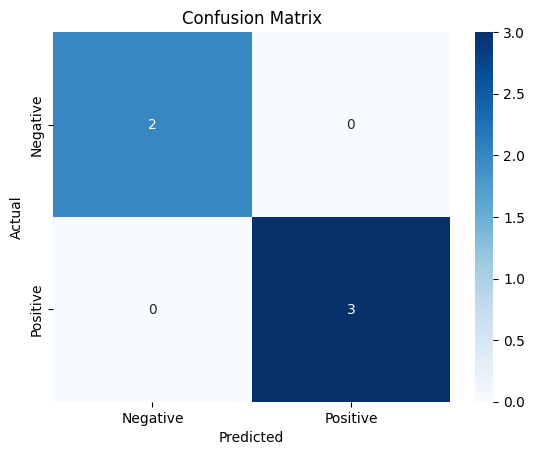

In [9]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report with specified labels
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], labels=[0, 1])
print("\nClassification Report:\n", class_report)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [10]:
# Display confidence scores
for text, pred, conf in zip(X_test, y_pred, confidence_scores):
    sentiment = 'Positive' if pred == 1 else 'Negative' if pred == 0 else 'Neutral'
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\nConfidence Score: {conf:.2f}\n")


Text: the flowers are pretty
Predicted Sentiment: Positive
Confidence Score: 1.00

Text: The product was successfull
Predicted Sentiment: Positive
Confidence Score: 1.00

Text: Children's day is celebrated across the nation today
Predicted Sentiment: Positive
Confidence Score: 1.00

Text: The network is poor here
Predicted Sentiment: Negative
Confidence Score: 1.00

Text: my battery is about to die
Predicted Sentiment: Negative
Confidence Score: 1.00

